In [1]:
# import cv2
# import numpy as np
# import array
# from matplotlib import pyplot as plt
# signal=[1,2,3,4,5,6,7,8,9,10]
# ans = 0
# def dft(signal):
#     M=len(signal)
#     li=[]
#     for u in range(0,M):
#         ans = 0
#         for x in range(0,M):
#             E = np.exp(-2j * np.pi * u * x / M)
#             ans += signal[x]*E 
#         li.append(ans)
#     return li
# print("User defined",dft(signal))
# print()    
# print("Inbuilt",np.fft.fft(signal))  

# def fft(signal):
#     G = []
#     H = []
#     Fr=[]
#     Fl=[]
#     even = [i for i in signal if i%2 == 0]
#     odd = [i for i in signal if i%2 != 0]
#     M=len(signal)
#     print(len(even))
#     if(M==1):
#         return dft(signal)
#     else:
#         G.append(dft(odd))
#         H.append(dft(even))
#         print("H is :\n",H)
#         for u in range(0,int(M/2)):
#             print("Entered")
#             temp = G[u]+np.multiply(H[u],np.exp(-2j * np.pi * u / M))
#             Fr.append(temp)
#             print("Fr contents: ",Fr)
#         for u in range(int(M/2),M):
#             temp = np.multiply(H[int(M/2)-u],np.exp(-2j * np.pi * u / M))
#             Fl.append(G[int(M/2)-u] -temp)
#         return Fr.extend(Fl)
# (fft(signal))

In [11]:
import numpy as np
import cv2
import array

def dft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=signal[x]*(np.exp((-2j)*np.pi*u*x/M))
        F.append(temp)
    return(F)

def fft(f):
    M=len(f)
    odd=[]
    even=[]
    G=[]
    H=[]
    if M==1:
        return(dft(f))
    else:
       for i in range(M):
        if i%2==0:
            even.append(f[i])
        else:
            odd.append(f[i])
       G=(dft(even)).copy()
       H=(dft(odd)).copy()
       F1=[]
       F2=[]
       for u in range(0,int(M/2)):
           temp1=G[u]+np.multiply(np.exp(-2j*np.pi*u/M),H[u])
           F1.append(temp1)
       for u in range(int(M/2),M):
           temp2=G[u-int(M/2)]-np.multiply(np.exp(-2j*np.pi*(u-int(M/2))/M),H[u-int(M/2)])
           F1.append(temp2)
#        print("fft function output:",F1)    
       return(F1)

a=[1,2,3,4,5,6,7,8,9,10]
print("inbuilt:",np.fft.fft(a))
print("calling fft:",fft(a))




inbuilt: [55. +0.j         -5.+15.38841769j -5. +6.8819096j  -5. +3.63271264j
 -5. +1.62459848j -5. +0.j         -5. -1.62459848j -5. -3.63271264j
 -5. -6.8819096j  -5.-15.38841769j]
calling fft: [(55+0j), (-5.0000000000000036+15.388417685876268j), (-5.0000000000000036+6.881909602355863j), (-5.0000000000000036+3.632712640026802j), (-5.000000000000002+1.6245984811645284j), (-5+0j), (-5-1.6245984811645346j), (-4.999999999999998-3.632712640026806j), (-4.9999999999999964-6.8819096023558695j), (-4.999999999999984-15.388417685876266j)]


In [3]:
import cv2
import numpy as np
import pandas as pd
img = cv2.imread("lenares.png",0)
def find_fft(img):
    row=[]
    col=[]
    result = np.array(img)
    for p in result:
        row.append(fft(p))
    result2 = np.array(row)
    
    for p in result2.T:
        col.append(fft(p))
    result3 = np.array(col)
    print("inbuilt fft2 : ",np.fft.fft2(result))
    return result3.T
print("user defined:  ",find_fft(img))

inbuilt fft2 :  [[1319702.            +0.j          -19344.42525843+82525.89106234j
    60483.58776986-42588.97054748j ...  -12072.25087017-19713.52496986j
    60483.58776986+42588.97054748j  -19344.42525843-82525.89106234j]
 [   2435.86518667-47817.40803532j  -65741.88032027+51810.40204489j
   -40092.69629329 +8595.0098645j  ...   23521.02473668+25419.23826323j
   -11795.03745458+20724.48706195j    3224.87387249+28532.73929314j]
 [ -13701.86777588-10619.87490491j  -10273.49633465 -4326.76081634j
    24417.19402533-13577.40740847j ...   13240.25898304+31712.88289026j
   -24478.1749259  -5366.84854063j   27295.6486436   -840.05320334j]
 ...
 [  18689.55959453 -8115.61955272j   27269.89529015+23853.97617467j
   -17484.71134566 -6946.27752685j ...   36724.26088283  -322.68694376j
     2386.90296846-27689.74585914j   -1820.03985942+24051.74871667j]
 [ -13701.86777588+10619.87490491j   27295.6486436   +840.05320334j
   -24478.1749259  +5366.84854063j ...  -22963.93731651-23957.98751897j
   

In [4]:
import math
import cmath 
dog = cv2.imread("dogres.jpg",0)
def magnitude(matrix):
    mag=[]
    mag2=[]
    li1=[]
    li2=[]
    for i in range(0,matrix.shape[0]):
        li1=[]
        li2=[]
        for j in range(0,matrix.shape[1]):
            li2.append(abs(matrix[i][j]))
            li1.append(((matrix[i][j].real)*(matrix[i][j].real) + (matrix[i][j].imag)*(matrix[i][j].imag))**0.5)
        mag.append(li1)
        mag2.append(li2)
    mag=np.array(mag)
    mag2=np.array(mag2)
    print(mag)
#     print("inbuilt mag : ",mag2)
    return mag
def phase(matrix):
    phase=[]
    li=[]
    for i in range(0,matrix.shape[0]):
        li=[]
        for j in range(0,matrix.shape[1]):
#             li.append(math.atan(float(matrix[i][j].imag)/float(matrix[i][j].real)))
            li.append((cmath.phase(matrix[i][j])))
        phase.append(li)
    phase=np.array(phase)
    print("phase is : ",phase)
    return phase
fft_lena = find_fft(img)
fft_dog = find_fft(dog)

lena_mag_dog_phase = magnitude(fft_lena)*(np.exp(1j*phase(fft_dog)))
print("combined matrix with magnitude of lena and phase of dog:\n\n", lena_mag_dog_phase)
dog_mag_lena_phase = magnitude(fft_dog)*(np.exp(1j*phase(fft_lena)))
print("combined matrix with magnitude of dog and phase of lena: \n\n", dog_mag_lena_phase)

inbuilt fft2 :  [[1319702.            +0.j          -19344.42525843+82525.89106234j
    60483.58776986-42588.97054748j ...  -12072.25087017-19713.52496986j
    60483.58776986+42588.97054748j  -19344.42525843-82525.89106234j]
 [   2435.86518667-47817.40803532j  -65741.88032027+51810.40204489j
   -40092.69629329 +8595.0098645j  ...   23521.02473668+25419.23826323j
   -11795.03745458+20724.48706195j    3224.87387249+28532.73929314j]
 [ -13701.86777588-10619.87490491j  -10273.49633465 -4326.76081634j
    24417.19402533-13577.40740847j ...   13240.25898304+31712.88289026j
   -24478.1749259  -5366.84854063j   27295.6486436   -840.05320334j]
 ...
 [  18689.55959453 -8115.61955272j   27269.89529015+23853.97617467j
   -17484.71134566 -6946.27752685j ...   36724.26088283  -322.68694376j
     2386.90296846-27689.74585914j   -1820.03985942+24051.74871667j]
 [ -13701.86777588+10619.87490491j   27295.6486436   +840.05320334j
   -24478.1749259  +5366.84854063j ...  -22963.93731651-23957.98751897j
   

In [5]:
#Finding the inverse of the dft image to get original image
# def original(img):
#     row=[]
#     col=[]
#     result = np.array(img)
#     for p in result.T:
#         col.append(fft(p))
#     result3 = np.array(col)
#     for p in result3:
#         row.append(fft(p))
#     result2 = np.array(row)
#     return result2
# #     print(result3.T)
# #     print("inbuilt fft2 : ",np.fft.fft2(result))
    

In [10]:
# IDFT
def idft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=(signal[x]*(np.exp((2j)*np.pi*u*x/M)))
        F.append(temp)
    return(F)
img =  [(75+0j), (-28.500000000000025+33.774990747593094j), (-19.49999999999997-32.042939940024254j), (33-0j), (-19.49999999999997+32.042939940024254j), (-28.50000000000002-33.774990747593094j)]
def find_idft(img):
    idft_result = idft(img)
    idft_real=[]
    for item in idft_result:
        idft_real.append(item.real)
#     print("user defined idft: ",idft_real)
#     print()
    print("inbuilt",np.fft.ifft(img))
    return idft_real
# img =  [(75+0j), (-28.500000000000025+33.774990747593094j), (-19.49999999999997-32.042939940024254j), (33-0j), (-19.49999999999997+32.042939940024254j), (-28.50000000000002-33.774990747593094j)]
print("user def: ",find_idft(img))

inbuilt [ 2.+0.0000000e+00j  5.-5.1279005e-16j  7.-5.1279005e-16j
 10.+0.0000000e+00j 45.+5.1279005e-16j  6.+5.1279005e-16j]
user def:  [12.000000000000007, 30.0, 41.99999999999994, 60.0000000000002, 270.0, 35.99999999999994]


inbuilt [16619.84355824-1.96905603e-10j 17888.40581836-2.42876013e-10j
 18459.84607681-2.39552946e-10j 18579.75213783-3.63047548e-10j
 18862.80772385-3.19349369e-10j 18673.13842282-1.26954551e-10j
 17801.85694348-1.29437481e-10j 17239.03232959-6.12149476e-11j
 16997.77396428+4.39590087e-11j 16134.48139486-4.62607637e-11j
 15623.40240309-3.17454217e-11j 15049.61410359+1.03731482e-10j
 14319.42665455-1.27803883e-10j 13801.01834428-1.78547316e-10j
 13152.4006289 +1.75955383e-10j 13217.12565088+1.90190131e-10j
 13952.74302739+1.08099592e-10j 13924.18917552+2.78057180e-10j
 13511.31933734+4.30489977e-10j 14168.37873133+3.17483060e-10j
 14507.02494327+1.58215085e-10j 14845.89068843+1.05212511e-10j
 14599.07733159-7.92750283e-11j 14078.15945488-1.68790598e-10j
 13304.64916875-8.92120327e-11j 11674.05092355-1.11117808e-10j
 10183.45580995-1.44987582e-10j  9902.83236968-6.39128729e-12j
 11487.57284765+8.33906928e-11j 13796.19318057+1.89051059e-11j
 14092.08703499-1.06852982e-11j 13925.61120713-

inbuilt [ -30.06010344+212.54962253j  108.60617087  +2.08606522j
  103.26119872-103.67274961j   54.14783359-115.02999663j
   84.30182882 -23.60145308j  131.30525481 -36.60105315j
  138.9348913 +120.06921277j  -56.55716279 +19.89777613j
   78.24266073 -15.56079192j  -50.61520604+192.42662671j
  -20.83398668 +95.93589717j   29.02258989+222.97069388j
  -86.41716719 +33.96264062j -186.79651879-207.60427643j
 -112.34546552 -64.55438475j -129.0472224  -20.92767469j
   44.75099703-200.29809774j  311.60775541-205.36131458j
  146.15533541 -55.718625j     77.73577201 +36.87630376j
  -63.03467982  +5.32352872j -132.97778839-132.07596023j
 -120.21274321-250.76269267j  -88.95069974 -35.0034955j
   52.82151558-186.26574257j   30.22767331 -61.71289689j
   29.99774361 +85.8423238j   149.78101465-303.10869652j
   78.47543114-259.18714514j   84.1564183 +112.79137222j
  -56.70784021+191.89034148j  -92.17021062 +35.11935558j
 -152.77644061-195.19398605j -122.73716288-217.89073895j
  -93.80452443-276.75084

inbuilt [-101.33528543 +93.82834578j   24.30402109 +67.55013699j
   26.25190016 -70.24600034j  -17.23375358 -77.48605154j
  -18.22796582 -52.71532768j  -11.57816895 +26.34214071j
    7.76818663 -26.27271064j    0.87179684  -1.01984121j
  -86.16666    +93.52085427j  -11.49579266 +28.93173292j
  -41.29921512 -44.43451729j   61.62485542-103.40318375j
  -80.04394497 -26.61413053j  -86.76687504 +47.88768761j
    6.02013568 -49.2434086j   -24.11603571 +23.74421223j
   54.22706553-132.83545184j  120.25163406 -12.03546173j
    3.35091707  +5.06687221j   -7.23623263 -27.89816465j
    2.0525174  -40.4193392j   -53.38595915 -23.03989899j
   76.16736055 +20.78211586j    0.63409928  -7.42729166j
  -19.73654255 +29.24488831j  -45.93440032 -98.87162525j
  125.46336235 +22.4740547j   125.09354262 -36.48318385j
  -37.22872003+113.56062593j   -5.71916539 -13.86987041j
    2.6475149  +27.40946652j   78.19385608 +86.93339581j
  -28.44367914  +4.67409394j   35.27139282 -39.91787315j
  -76.56561009 +41.9384

inbuilt [ 130.35829408  -1.05135402j    1.3358427  +55.70835054j
    5.41689528 +15.51966524j   46.01835521 +58.61703901j
   14.82155057 +32.96050573j  -78.28756034 +84.93587394j
   32.1899037  -16.04059845j   25.47980113+125.32298953j
  -99.50336243 +52.31216497j   68.17346046 +41.96999139j
  -12.52707294 -21.33743832j  -27.59709008 -75.50182272j
  -15.53738074  -5.17512363j    4.96992859 +47.00986274j
  -77.88301316 +31.53216775j    3.69554439  +0.1889627j
  143.89169517 +87.67359952j  -20.66664926 +16.98938493j
  -69.97558043 -77.78430279j   70.28508834 +95.90763813j
   75.14958539 +73.25548941j   99.68017868+102.66130562j
    1.03667011 -94.59820386j  -41.89335913+100.15110445j
   55.59159203 -34.83393047j -117.46037728 +53.24852855j
  104.73166207 -24.92027579j    3.38327113 +81.89064742j
  -14.29227402 +50.28004565j    3.15441638 -25.89603815j
   -9.42598366+107.36759267j    8.41445518 -74.51529974j
  -25.41029369 +67.813613j     65.52719637 -13.90069894j
  115.81788514  -2.15288

inbuilt [ 303.67772632 +33.62255635j -125.46343435+172.07475056j
 -180.856628    +8.67167793j  -60.50138138 -71.4888248j
 -110.50920706  -1.4996264j  -163.13151548+101.38543041j
   92.22294015+142.98000204j   79.79527996 -12.26655375j
   73.65936417 +60.3868763j   138.86951227 +62.18180349j
  -21.82062234 -40.25924431j -103.10975131 +55.43886708j
   62.10618381 -93.23926841j -100.26973646 +15.25769662j
  -59.64195194+146.76016073j   16.07357432 -44.49213195j
  -53.00050579  -9.04390866j  -58.02071108 +52.92659379j
   42.38111675 +11.13768384j   71.78012628 +30.58291617j
   50.55447193  -7.66665664j  108.42453345 -97.0766542j
  -75.11341277-130.33642606j   -7.82931221 +18.75303159j
   11.42524693 +13.85881903j  152.21437715 +53.27336727j
   88.57384749 -46.57697393j   -0.71688932+131.19625426j
  107.23266894 -51.38211742j   11.13030789-218.37992308j
  -98.62195874-116.3795554j   153.39368731 +59.63671519j
   33.791525   -50.58781413j  107.29557949  +7.51606729j
  173.20794949 +95.724144

inbuilt [ 2.99332033e+00-123.88582649j  1.56563977e+02-144.13018261j
 -3.67549144e+01-130.77200562j -7.99516209e+01 -83.83797262j
 -9.10074497e+01-277.07282916j -1.88011656e+02 +54.12891505j
 -4.13447641e+01 -24.2307276j   1.45348527e+02 -64.92787272j
  3.68722938e+02 -91.24863098j  1.00950474e+02 -47.44927181j
 -2.38979226e+01-121.91226788j -1.34703472e+02  +5.22707183j
 -8.12717134e+01-142.30026075j -9.85837876e+00-107.5741392j
  1.60091465e+01 -71.54325896j -1.05049142e+02 -37.70717836j
 -1.03365611e+02 -82.85495612j -5.84776171e+01-128.5708583j
  6.46546440e+01-397.04537685j  1.39736172e+02 -45.22827011j
  1.67551792e+02 +82.52748705j  1.25206894e+02-139.87629552j
 -2.96884268e+02-194.16187992j -2.99898555e+02  -4.91827053j
  9.86135285e+01+162.25444344j  1.76669948e+02+275.12977865j
  1.60046606e+02+226.38706584j -8.93307688e+01+124.87249683j
 -9.92895954e+01-131.55387283j  3.45880318e+01 -59.58707685j
 -1.14774030e+02-144.88852636j -1.41279208e+02  +9.09573621j
  1.46184695e+02+3

inbuilt [18241.85112589-0.00000000e+00j 17482.29494805-7.03948899e-11j
 18375.43632237-3.63797881e-11j 15301.00803644+5.79166226e-11j
 14866.75074589+1.07102096e-10j 18121.08704038+6.79574441e-11j
 14448.04869748+6.63567334e-11j 14526.61140551-1.22236088e-11j
 17123.28124499-1.54250301e-11j 16494.03775615+1.64436642e-11j
 18350.73930283-3.88536137e-11j 16771.04645111-1.93540473e-11j
 19096.60581577+6.73026079e-12j 19658.81848195-6.76664058e-12j
 18653.69999155-2.14095053e-11j 18170.45369115+5.48607204e-11j
 18804.90503907+5.22413757e-11j 19664.06830012+4.00177669e-13j
 18066.11891949-2.63389666e-11j 18136.23784155-3.96539690e-11j
 19316.1918387 -7.65055574e-11j 18420.03648938-7.51060725e-11j
 18631.553536  -1.18147909e-10j 18229.24728054-1.19134711e-10j
 19093.95869858-7.13112058e-11j 18599.4379855 -5.97719918e-11j
 18714.12413176-7.45149009e-11j 18397.53563183-5.69889380e-11j
 18989.17982123-3.24916982e-11j 17603.85818015+6.32644515e-11j
 19356.02896488+8.08961431e-11j 20056.27866017-

inbuilt [14550.86677905-0.00000000e+00j 15759.05133832-9.89530236e-11j
 15583.16922303-8.71659722e-11j 16126.01584807+2.47382559e-11j
 15266.98295326+5.74800652e-11j 15179.35541092+4.47471393e-11j
 14228.2801745 -4.52956783e-12j 15408.13573708-6.03904482e-11j
 13828.44633023-1.02627382e-10j 15849.18338605-8.06176104e-11j
 15589.50761517-9.53150447e-11j 14776.23626938-1.08702807e-10j
 13231.61850463-7.42147677e-11j 14989.72608499-5.72617864e-11j
 14853.52629585-5.25324140e-11j 14167.8115074 +5.25324140e-11j
 15030.2671358 +6.24277163e-11j 14930.46364892-4.39467840e-11j
 15182.68637506-8.51287041e-11j 14301.88757869-5.36965672e-11j
 14286.06632149-1.32422429e-11j 15357.9769536 -4.58385330e-12j
 15931.2962652 -8.78208084e-11j 17750.98475375-4.96675057e-11j
 17743.9021984 +6.36646291e-13j 17303.25296564-3.18686944e-11j
 18041.10226294+3.94175004e-11j 19026.33867029+7.27868610e-11j
 19582.95916172+1.66619429e-11j 20498.71236217+1.60071068e-12j
 19910.65210107+1.20053301e-10j 18374.24096932+

inbuilt [15129.92663325-0.00000000e+00j 12858.8912162 -3.21597327e-11j
 16743.71154126-8.76025297e-11j 16945.78645976-1.92085281e-11j
 19924.05036549+4.59840521e-11j 17892.73507814+6.95581548e-11j
 16201.33827314+5.82076609e-13j 15534.95090612-3.95812094e-11j
 15613.62266739-3.70346243e-11j 15411.70665631+1.31558409e-11j
 15629.95857042+4.83123586e-11j 14744.81042328+3.92174115e-11j
 13170.23127405+8.71659722e-11j 14378.72750442+6.15364115e-11j
 13548.52081415+4.52564564e-11j 15277.69681461+1.46537786e-10j
 15604.43067522+1.12104317e-10j 15869.63805416+2.23371899e-11j
 13341.42337972-5.69343683e-12j 12698.38216508-1.85627869e-11j
 12546.94131309+1.68893166e-11j 11893.49464027+5.09817255e-11j
 11447.11201696-6.65750122e-12j 10890.31224206+8.85847840e-12j
 10991.71106419+6.43285603e-11j 10712.08325789+9.03310138e-11j
 12461.57779111+3.57522367e-11j 13013.89498175+4.13820089e-11j
 13298.00500442+5.41695044e-11j 11979.21566737+6.35645847e-11j
 12871.42027927+1.54914233e-10j 12443.10173891+

inbuilt [21046.04436532-0.00000000e+00j 20940.77936691-3.72529030e-11j
 18814.58191403-8.14907253e-12j 18415.31690584+3.66708264e-11j
 17226.76801861-7.71251507e-12j 16339.04453229+4.29281499e-12j
 15952.86112566-1.13504939e-11j 13101.68478437-9.14582188e-11j
 14460.98304833-4.47471393e-11j 12865.21235949+1.60071068e-11j
 14929.71849722-4.25643520e-12j 15058.09377846-1.22171286e-10j
 16173.56777215-1.06883817e-10j 16253.0210207 -7.18500814e-11j
 14107.337842  -5.98811312e-11j 12210.66334635+3.71073838e-12j
  9302.81089219+5.12227416e-11j  8469.28690231-6.83940016e-12j
  8885.30958168-9.58971214e-11j 11121.9185218 -1.25467068e-10j
 11873.76959332-6.66841515e-11j 13407.64280606-4.22005542e-11j
 11502.00284364-1.24910002e-10j 12160.26356756-1.20726327e-10j
 13810.23231953-5.08589437e-11j 13184.60798901-1.05937943e-10j
 13130.93808462-1.34459697e-10j 13622.7342409 -1.22945494e-10j
 12637.97435338-6.30825525e-11j 11342.43005136-8.29459168e-11j
 11461.00100615+1.90630089e-11j 11064.77227292-

inbuilt [15005.88877656-0.00000000e+00j 15978.00699569-1.86264515e-11j
 16669.74546954-3.84170562e-11j 14786.00362958+4.36557457e-12j
 15246.44605199-2.88127922e-11j 13735.73143635-2.73576006e-11j
 14506.27925807-2.67755240e-11j 12678.43395352-1.22818165e-10j
 15154.91753498-1.24564394e-10j 15427.31958728-6.51925802e-11j
 14950.58613916-3.20142135e-11j 15447.16592593-8.87666829e-11j
 17382.40205822-4.91854735e-11j 17531.96731916-1.01863407e-11j
 18106.84983378+3.63797881e-11j 19549.14205632+9.77888703e-11j
 20921.61518069+1.20489858e-10j 17826.80315663+9.02218744e-12j
 16232.38887556-4.93309926e-11j 17571.99458148-2.18278728e-11j
 17745.60969206+8.23638402e-11j 18122.68696775+8.34552338e-11j
 16242.16197175-3.21506377e-11j 14802.11566258-1.65709935e-11j
 15647.92262567+9.04037734e-11j 17454.49583489+7.88713805e-11j
 17436.27357373+8.29822966e-11j 16466.360714  +1.03627826e-10j
 15971.02450083+7.00038072e-11j 15152.47220127+1.91357685e-11j
 13141.53218763+1.15833245e-10j 12085.66621134+

inbuilt [13071.2094695 -0.00000000e+00j 11506.26421961+1.28056854e-11j
 13263.51114584+5.12227416e-11j  8728.07181465+4.22005542e-11j
 13716.84223547-3.49245965e-12j 14281.60719983-4.65661287e-11j
 12499.22053787-5.82076609e-12j 14551.45489395-7.10133463e-11j
 15842.9414195 -9.02218744e-11j 14589.36170643-1.62981451e-11j
 15832.60065559+3.52156349e-11j 16234.85651364-8.38190317e-11j
 14113.9913146 -9.34232958e-11j 13550.54546609-5.23868948e-11j
 14281.87781981+1.80443749e-11j 14130.57267304+7.53789209e-11j
 14877.41549085+4.42378223e-11j 15341.02415976-4.68571670e-11j
 14415.61903703-8.78935680e-11j 13299.57314718-7.77072273e-11j
 13854.2338565 -1.52795110e-11j 12846.8146138 +3.09955794e-11j
 14281.08963245-3.86296506e-11j 13554.6114793 -3.57977115e-11j
 12594.57456509+1.41017154e-11j 12311.15802302+1.49884727e-11j
 13283.52073965+2.85081114e-11j 14897.63003428+8.93487595e-11j
 14181.27442732+6.22151219e-11j 12015.06920331+2.48837750e-11j
  8311.45001044+3.21597327e-11j  6616.35908304-

inbuilt [18032.269348  -0.00000000e+00j 18116.44749261-4.80213203e-11j
 14141.62883391-5.02041075e-12j 14818.70160501+1.75350579e-11j
 16251.44329553-5.61703928e-11j 13694.12280652-1.12340786e-10j
 12535.95452014-5.12227416e-11j 13312.89767393-9.30594979e-11j
 13034.72206841-9.24046617e-11j 14635.83337279+1.20780896e-11j
 15625.72642956+1.36788003e-11j 15770.01635714-9.38598532e-11j
 15630.17568951-7.03585101e-11j 14123.34532449-4.11091605e-11j
 16775.5328843 +3.11410986e-11j 15569.23894127+8.66566552e-11j
 14404.20777179+1.42026693e-10j 14414.04385656+3.90718924e-11j
 14201.17535572-4.19822754e-11j 14156.61199562-2.76486389e-12j
 13728.50324866+1.96450856e-11j 14853.54655337+7.71615305e-11j
 15696.04245797+7.26868166e-11j 15997.60571337+6.40648068e-11j
 17307.81977282+9.97169991e-11j 17588.43920177+6.77027856e-11j
 18900.38354816+7.88350007e-11j 19364.94081708+1.28566171e-10j
 19434.61539406+6.31553121e-11j 13568.253606  +8.97671271e-11j
 11299.17296495+1.97323970e-10j 11974.99899072+

inbuilt [22276.39024277-0.00000000e+00j 19123.03330933+2.32830644e-11j
 19163.28743305+6.51925802e-11j 19995.88324546+3.02679837e-11j
 19784.67567045+3.37604433e-11j 21087.5597612 +4.07453626e-11j
 20403.4177581 +2.32830644e-11j 22003.5696481 -5.12227416e-11j
 22640.7485718 -4.42378223e-11j 18487.62735571+5.23868948e-11j
 14961.02462113+2.21189111e-11j 12613.38380392-5.61703928e-11j
 15209.9977601 +2.73576006e-11j 18702.98251604-2.50292942e-11j
 18128.04649814+4.13274392e-11j 17344.45276725+9.40053724e-11j
 17032.74878682+8.81118467e-11j 15995.05011005+4.46107151e-11j
 15281.41254409-8.51287041e-12j 15766.7775671 -2.33558239e-11j
 13959.93961479-2.11593942e-11j 12986.36950003+3.94175004e-11j
 13298.37028824+2.04022399e-11j 12546.98887278-1.28329702e-11j
  8197.99595757-3.70164344e-12j  8319.49214504-5.97356120e-11j
 10289.75354289-3.65525921e-11j 11862.56652571-1.96723704e-11j
 13440.69832352-7.50947038e-11j 11992.0909231 -1.59707270e-11j
 14051.90313034+6.07406037e-11j 13623.08474002-

inbuilt [13036.24889274-0.00000000e+00j 12731.01741602+1.71712600e-11j
 13616.38035107-1.28056854e-11j 13482.92994132+2.48837750e-11j
 14083.46151164+7.20319804e-11j 12514.58171154+1.12813723e-10j
 12179.11120689+6.17001206e-11j 12610.45035647+1.86264515e-11j
 10304.29530004+3.37604433e-11j 10276.4026027 +2.97950464e-11j
 10638.87372723-3.20142135e-12j 11156.01529367-4.35829861e-11j
 11446.06637822+2.30647856e-11j 12524.10786455-3.20142135e-11j
 12301.86020749+2.18278728e-11j 12536.96935727+1.41735654e-10j
 15160.84256169+1.62399374e-10j 16881.99051824+5.52972779e-11j
 17576.58522964-5.52972779e-12j 16091.61401312+1.97906047e-11j
 18301.95338918+1.89174898e-11j 17228.29680898+5.98083716e-11j
 15800.17533314+3.87808541e-11j 15708.79355657-7.43966666e-11j
 12259.91579005-6.15682438e-11j 12620.58367494-7.58154783e-11j
 11725.12391146+6.24368113e-12j 12373.95766127+3.96903488e-11j
 13971.08689738+5.79530024e-11j 11114.60552095+1.04482751e-10j
  4388.47241607+1.52795110e-10j  5655.46694778+

inbuilt [13082.07932936-0.00000000e+00j 14081.49408208+4.30736691e-11j
 14568.38965114+3.78349796e-11j 14210.6895935 +5.64614311e-11j
 14161.71916111+1.26310624e-10j 13699.67354939+1.12340786e-10j
 13151.34694983+4.24915925e-11j 13223.21415286-1.83354132e-11j
  7716.06688214+9.24046617e-12j  8741.95339955+5.95537131e-11j
  6388.06221117+1.41153578e-11j  3903.40019902-4.65661287e-11j
  6906.05996871+3.56521923e-11j  7965.68476927+2.67755240e-11j
  9779.41053333+4.92218533e-11j 12038.13503898+1.17295826e-10j
 12534.35154215+1.50121195e-10j 13555.21729782+8.22910806e-11j
 13157.00718059+6.03904482e-11j 12665.50668509+3.47790774e-11j
 12564.22638479-4.24188329e-11j 13251.16682634-3.00497049e-11j
 12362.441577  -2.64117261e-11j 12808.31122937-5.34782885e-11j
 14286.50480459-1.55887392e-11j 15926.43236688-1.48648382e-11j
 17507.1449399 -1.71166903e-11j 18768.83544266+4.16912371e-11j
 16436.04982   +2.21916707e-11j 16972.9756633 +8.15634849e-11j
 16793.59789216+1.34241418e-10j 16845.61330965+

inbuilt [ 8691.22119746-0.00000000e+00j  7165.27930134+1.74622983e-12j
  6099.12808968+8.73114914e-12j  6829.60222426-3.20142135e-12j
  6370.7622863 +7.18864612e-11j  7135.07220023+1.67929102e-10j
  6521.1388156 +8.93487595e-11j  6205.82326333+4.88944352e-11j
  4367.64812521+8.49831849e-11j  3744.28736705+1.17579475e-10j
  3125.21223345+5.64614311e-11j  6417.06043474+6.76664058e-11j
  7872.72665655+1.00299076e-10j 10025.40546874+8.69931682e-11j
  9967.01023327+9.89530236e-11j 13245.42707251+1.51339918e-10j
 12518.67770092+1.26310624e-10j 14603.80041062+1.14523573e-10j
 12819.01345094+1.13232090e-11j 11373.90825318+1.32786226e-11j
 12066.53801188+1.88606464e-12j 11403.77096422+2.66118150e-11j
 11256.81882305+2.07364792e-11j 15300.83676815+6.36464392e-11j
 16561.17795271+3.05999492e-11j 16658.22550788-7.05767889e-12j
 15806.21194477-3.78986442e-11j 13877.28654148+1.20235200e-11j
 13152.29964783-1.69529812e-11j 12181.46241031+2.52475729e-11j
 12032.76684006+1.72996124e-10j 11915.34074237+

inbuilt [19806.70711643-0.00000000e+00j 18727.8355158 -3.84898158e-11j
 19125.46490157+1.09139364e-11j 18516.94911709+5.15137799e-11j
 18038.99382052+1.69966370e-10j 17849.35381929+1.42326826e-10j
 17703.29040429+5.06770448e-11j 18394.27140185+2.29920261e-11j
 18588.60028209+8.78935680e-11j 16532.39780262+1.35769369e-10j
 17167.1070835 +1.08848326e-10j 16135.04627834+6.47560228e-11j
 14930.56996977+7.60883268e-11j 13241.14006099-6.03904482e-12j
 12799.80726288-4.57339411e-11j 13513.6427756 +5.16592991e-11j
 11831.83040621+7.65430741e-11j 12625.45721886+2.45017873e-11j
 13422.41345035-6.03904482e-12j 14453.24998473+4.91854735e-11j
 14667.58590067+6.54836185e-11j 13517.75821662+1.05210347e-10j
 10660.6284209 +8.15634849e-11j  9678.44553216+4.51223059e-11j
 10198.11764616+7.79846232e-11j  9643.13748579+5.79893822e-11j
  9521.21696111+8.50695869e-11j  9365.28601784+8.04470801e-11j
  8408.28676294-1.44063961e-11j  7141.43064132-2.09547579e-11j
  8366.0023389 +3.87080945e-11j  9137.69452226+

inbuilt [14109.77541472-0.00000000e+00j 13805.76254432-1.74477464e-10j
 11304.17957545-9.09494702e-11j 13289.49382531-4.10909706e-11j
 12871.22342734-1.14232535e-11j 12564.34005029+1.18598109e-11j
 10849.00282454+2.80851964e-11j 11301.53163893+2.05182005e-11j
 12515.11870617-3.57249519e-11j 13192.30258843+1.65891834e-11j
 12770.86840604+1.71130523e-10j 13141.04124843+1.51485438e-10j
 10050.69491478+1.32713467e-10j 10703.25272929+3.36149242e-11j
 10851.76375185+1.48429535e-11j 12309.37900824+8.78935680e-11j
 12666.88210684+8.01628630e-11j 13260.22258355+2.84126145e-11j
 12413.94966826+3.24507710e-11j 11922.78120729+4.97311703e-11j
 11292.99179864+6.63203537e-11j 11241.29964556+6.69388101e-11j
 11520.11473822-6.05723471e-12j 12377.93846931+3.65616870e-12j
 12103.61791598+1.23063728e-10j  9764.04005661+1.39334588e-10j
 10538.53438639+1.06983862e-10j 10269.39879946+1.01517799e-10j
  9910.56036313+1.28238753e-10j 10033.27977538+1.08229870e-10j
  9654.62148938+2.31848389e-10j 10816.93862091+

inbuilt [ 2.37388667e+02 -484.97687511j  1.30463110e+02 -517.32195242j
  1.73338687e+02 -534.64395775j  1.81326733e+01 -609.23758773j
 -3.71263728e+02 -147.31085009j -5.57675449e+02  -66.70934485j
 -3.80359965e+02  +39.22831075j -5.10899095e+01 +428.21363937j
  2.68715637e+02 +300.27842577j  3.38860082e+02 +138.23189998j
  3.73506663e+02 +306.6884342j   3.26209791e+02 +343.66230158j
  1.64521948e+02  +45.18924173j  5.10475021e+01  -62.79691487j
 -1.11384683e+02 -160.08814889j -2.86421862e-01 -157.37581619j
  1.31370634e+02  +39.10746566j  2.39767473e+01  +87.26280765j
 -6.31352735e+01 +319.27567389j -2.29435843e+02 +228.28109466j
 -1.35657584e+02  +80.12031227j  1.02679369e+02 -265.67401422j
  2.25168175e+02-1020.6922877j   6.72653451e+01 -565.89682046j
  9.43521638e+01  +67.21568005j  4.08087266e+02 -437.05372978j
 -2.61390825e+01 -354.66115434j  2.07305901e+02 -203.28891996j
 -1.18450360e+02 -295.74215771j -8.71465102e+01 -257.59169776j
  1.83125941e+02 -452.14461831j  5.15445689e+01

inbuilt [ 280.43078446-281.36730869j  367.43643541-110.05930117j
  334.88949465-102.64177186j  119.11765284-134.52747819j
   82.03610722 +76.65938702j  -36.11300701+184.38206692j
 -191.36340233+149.92497666j -265.16843916+130.84009577j
 -111.41270401 +35.49222655j  -33.463308   +74.43061071j
  -94.85049072 -16.70910739j -124.44594327 +69.99097774j
   41.21437258 -73.4449679j   319.50672933-130.29675826j
  233.8961312  -87.01194315j  332.56093014-104.01383362j
  119.69377049-234.48544914j  220.74656363-212.45394675j
  345.48291781 +13.39902835j  320.33282295 +70.76428453j
  -80.33601973 +27.47018889j -155.67105606-199.30078115j
 -151.42680984-160.34609152j   12.02902443 -93.34361871j
  195.04241495 +21.44951759j -110.20370711 -30.95552531j
    2.88521556 -80.0476841j   265.31603688-188.25897822j
  195.42770628 -19.50065581j -169.15766503+198.02927532j
  -25.37721172+330.08872519j  -60.93532027+170.60726786j
 -347.16303249-163.75024393j -105.30578741+240.8524572j
  108.90957536 -22.69604

inbuilt [  -2.66546928-1.06964440e+01j  -11.39798635+4.08528031e+01j
   65.5736586 +1.43031764e+01j  -71.64334789-1.49574451e+02j
  -14.26011435-4.20215201e+01j  -36.06261732+2.56863477e+01j
 -116.21295029-5.75278039e+01j  115.30669395-9.30726938e+00j
   95.38893723+5.21066200e+01j   22.54675562+1.06445813e+02j
    2.41894057+4.82769064e+01j   41.7375118 -2.41044930e+01j
  -10.40450413+5.90421705e+01j  -18.31599868+8.34982419e+01j
  150.61394709-1.03046877e+02j   54.43058089-1.54180238e+02j
  -18.74962408+1.05453797e+02j  -19.95432939-5.58954648e+01j
  168.82114442-1.00868912e+02j   55.45816019-2.38151287e+02j
  177.96973299-2.17420614e+02j  255.86328652+8.70584190e+01j
  253.06879226+5.29084465e+01j  230.98848483-1.61007314e+02j
   41.08374693+2.45913425e+01j  182.62799229-3.74075698e+01j
   93.46124049+1.08346846e+00j  -30.83057062+8.64847249e+01j
  242.52990281-4.13027091e+01j  190.97577358-1.47804159e+02j
   97.8454514 +3.57297022e+01j  166.73485486+1.65272351e+02j
   50.91474941-2

inbuilt [ 182.69642832 +85.10575868j   63.85153604+200.02839005j
   58.09338673 +49.93506795j  -38.58921008-134.48562967j
 -135.02981309 +59.56973589j  -58.06352409 +46.84905494j
   33.13685985-235.53901354j  -71.7618006  -75.66465769j
  -18.67382586  +5.4077456j  -139.43096403 -82.3437361j
  -38.93083097-114.66825064j  -45.95366378  +3.90817516j
 -100.01850646 -22.45065453j   43.24635963 +19.64239482j
  150.37141237 +53.41314269j -147.51266828 +62.3692242j
  -25.14719203 -26.51770569j  183.44008307 -95.76952819j
   37.71502302-161.96634387j  156.49553989 +43.88886709j
  130.64165192 +39.53722779j   16.42520099 +41.87009754j
  259.5156225  +58.50772376j  233.76741199 -58.75376375j
   89.2166386 +275.24043405j    6.97013967+333.91081936j
  530.12970801+151.77192914j   80.22545056-174.8764851j
  -58.98186913-103.30918977j  307.47435315 -55.92734779j
  290.92323031 -99.7431131j   177.99413223 +96.99242898j
  376.12549315 +93.59781339j -160.96334743+177.71579604j
   94.89067745 +33.5220457

inbuilt [ 510.76356553+106.08620225j  555.89007331+335.2003487j
  230.01632646+296.14181901j   61.89228849+154.15515644j
   95.98559774+280.56254252j  280.69967709+168.3057865j
  328.47769079+352.18673888j  266.79373636+320.79698538j
  195.38294039+256.89526743j  -72.28748299+330.05263109j
   59.91727378+250.97026841j   96.36487729+221.48305478j
  322.37628753+280.0016602j   245.51788453+165.81050484j
  101.55857782 -34.91224115j   27.5583089  +98.45715547j
  -54.79244612+130.46746564j -115.52091739+159.09534905j
  -53.1939615   -9.05731173j  -25.46449848 +27.25388669j
 -179.51732716 -62.32749555j -100.17268819 -51.18504103j
  145.71870436+118.21283419j  -41.38756235+166.26451421j
 -343.47829029-241.42509719j   72.03822318+101.21494256j
  112.16786027+204.96881988j  436.95702211+103.24099832j
  203.15284045+113.03420698j  532.0721023  -63.81915252j
  542.84965896+193.05369392j   51.39718818 -27.59481093j
  293.78404593 -14.02778167j  510.08753409-145.15528958j
  204.40247832 +58.043150

inbuilt [24080.75436991-0.00000000e+00j 14275.32287299-1.16124284e-10j
 13423.8136877 -1.49739208e-10j 15180.15353149-8.61473382e-11j
 15249.48339208-1.77242327e-10j 14759.45242884-2.46363925e-10j
 15854.51574664-5.67524694e-11j 16595.19703799+7.21774995e-11j
 15269.45835126+1.71421561e-10j 10617.84522332+1.00899342e-10j
 13244.29510942-1.14960130e-10j 15887.13713499-2.79396772e-10j
 16294.99518759-1.75496098e-10j 14248.73226061-3.58268153e-10j
 14389.48648592-1.90721039e-10j 12898.97310418+1.74077286e-10j
 13304.18589641+1.07393134e-10j 15408.13739162-1.98342605e-10j
 17850.38745954+4.81668394e-11j 16427.29057415+2.47382559e-12j
 17277.41794389-2.80342647e-10j 16760.93730548-2.03581294e-10j
 14774.96339772-3.36804078e-10j  9730.43645856-6.24022505e-10j
 12103.11388671-5.85441740e-10j 13619.83693224-3.12675184e-10j
 14133.08500043-1.85682438e-10j 13761.01737337-9.91349225e-11j
 13543.90203395-3.07773007e-11j 12819.60744109-2.48328433e-10j
 14904.46997379-4.66170604e-10j 14458.66165888-

inbuilt [19079.27396919-0.00000000e+00j 19513.47113679-7.15954229e-11j
 18358.51508253-1.22236088e-11j 18252.37760904-1.64145604e-10j
 17946.15705457-2.43890099e-10j 19153.1265112 -1.10594556e-10j
 20112.89496462+4.65661287e-11j 17912.49748596+9.95351002e-11j
 19030.06558668+1.46683306e-10j 17092.57097255+2.15368345e-11j
 17070.29504131-1.70548446e-10j 16600.50120188-1.84518285e-10j
 14659.73183743-2.06346158e-10j 15445.38029438-4.35393304e-10j
 13905.62863969-2.40179361e-10j 13015.27643187+3.00133252e-10j
 11870.25995008+1.34459697e-10j 13481.78216486-2.07073754e-10j
 12747.04454309+4.07089829e-11j 15069.80989569-2.53749022e-11j
 15659.26345957-2.03217496e-10j 16173.59383857-5.13682608e-11j
 14676.94275552-3.54666554e-10j 16771.3609479 -6.80374797e-10j
 12444.46238279-5.30625357e-10j 11748.05683399-2.15914042e-10j
 12565.98857784-2.53101007e-11j 12995.53310313-8.00355338e-12j
 11640.93773794-2.26646080e-11j 11841.44612739-1.96305336e-10j
 13000.80566523-5.36601874e-10j 15895.64312554-

inbuilt [18919.56007581-0.00000000e+00j 15024.37066674+2.85217538e-11j
 15201.23029419+2.91038305e-11j 16847.73448774-1.31549314e-10j
 15712.38084135-1.58906914e-10j 12689.46444077-1.23109203e-10j
 10059.80843191-1.83354132e-11j  9633.90998549+5.70435077e-11j
  7988.90103226+2.86163413e-10j 10408.91620093+1.84008968e-10j
 10214.33272911-1.83863449e-10j  8716.96541732-2.62516551e-10j
  8078.66250097-1.14960130e-10j  6524.0429995 -1.89756975e-10j
  7937.1803438 -1.75059540e-10j 10176.52045506-3.97267286e-11j
  8399.5914266 -3.09955794e-11j  8824.03987522-8.06176104e-11j
  8656.28506467+3.76894604e-11j  9860.85964474+8.30914360e-11j
  9977.72743759-1.25000952e-10j 13374.14823064-1.49739208e-10j
 10493.48256232-2.72775651e-10j 12525.19276015-5.16447471e-10j
 13807.85618333-4.30263754e-10j 14100.86019305-5.38420863e-11j
 15031.23214406+5.92626748e-11j 14073.30194692-1.81898940e-12j
 15205.53529187+4.46016202e-11j 10473.19510498-3.02752596e-10j
 12442.05067145-5.13100531e-10j 11846.6990763 -

inbuilt [21071.27003414-0.00000000e+00j 13296.70265202+1.69384293e-10j
 12884.08171631-1.10594556e-11j 14340.52130269-2.71247700e-10j
 14579.44735802-3.73693183e-10j 17685.63007233-2.09547579e-10j
 16534.88181085+9.31322575e-12j 15057.70182444+1.87428668e-10j
 12925.5150266 +2.76777428e-10j 11243.74836989+1.44282239e-10j
  9091.06365146-9.13860276e-11j  8372.72741658-1.49593689e-10j
  9425.65778862-5.10772225e-11j  9466.97140189-1.31476554e-10j
  8707.21024956-6.31553121e-11j  7310.27619299+2.12457962e-10j
  7967.79845032+1.15542207e-10j  8477.53555385-1.38243195e-10j
  8570.7581645 +9.56060831e-11j  8258.89119402+1.32567948e-10j
  9920.58192774-1.24273356e-10j 10152.85190247-4.51109372e-11j
 13011.41035431-3.26326699e-10j 10286.65299845-5.64759830e-10j
 11604.55798062-3.82406142e-10j  9882.11431863+2.05909600e-11j
 11583.87277058+1.30803528e-10j 11461.88191978-1.18961907e-10j
  9870.03619491-1.16633601e-10j 11334.13611477-2.23662937e-10j
 15131.57287604-3.62633727e-10j 15376.09948438-

inbuilt [23837.94768484-0.00000000e+00j 16655.72313265+4.19095159e-11j
 15838.79385227+9.54605639e-11j 12406.25867348-1.47847459e-10j
 12898.82703416-4.16766852e-10j 13181.33403823-2.91038305e-10j
 11297.2577645 +7.45058060e-11j 12010.4573334 +2.33121682e-10j
 11903.57787229+2.65426934e-10j 10710.98808012+1.77824404e-10j
 12167.06054877-2.26646080e-10j 12239.48280585-3.32656782e-10j
 11530.11377282-8.46921466e-11j  8745.28807349-8.46921466e-11j
 16438.39396616-1.64873200e-10j  9858.45619005+1.09139364e-10j
  9073.99974717-7.10133463e-11j  7448.6270979 -2.08528945e-10j
  8307.50939712+6.54836185e-12j  9314.18055663+3.95812094e-11j
 10693.56338111-8.14907253e-12j  9198.47267912-7.58882379e-11j
 10157.99536657-3.11301847e-10j  9417.92416544-5.78720574e-10j
 10738.72159357-5.01504474e-10j 11477.99124818-8.23638402e-11j
 10139.25497551+1.07129381e-10j 10077.55555093-8.70113581e-11j
 13093.84286375+1.60434865e-11j 13226.77311534-1.39625627e-10j
 13248.9137324 -4.09199856e-10j 12014.95326945-

inbuilt [17071.64669505-0.00000000e+00j 17000.75414478-5.68252290e-11j
 17839.21363386-1.77533366e-10j 16870.54030796-2.46800482e-10j
 15875.36805808-3.98213160e-10j 17630.74926517-2.60479283e-10j
 14813.48828213+6.17001206e-11j 11747.36881439+2.19442882e-10j
 12641.68339742+2.10129656e-10j 16698.92884992+1.44937076e-10j
 15322.89869683-2.41561793e-11j 14117.72246304-1.67929102e-10j
 15091.26806195-2.18424248e-10j 15677.76205741-3.58995749e-10j
 15110.5936577 -1.63709046e-10j 14833.18073474+2.40470399e-10j
  9772.56736648+1.14669092e-10j  8953.7379962 -1.60362106e-10j
 11834.6928492 +7.45058060e-11j 12772.6641951 +3.81260179e-11j
  9807.4027842 -2.06928235e-10j  9410.53414956-2.06928235e-10j
 11928.22308885-3.84497980e-10j 10179.7230952 -6.57764758e-10j
  8357.01626711-4.27471605e-10j  9543.66026852-3.64525476e-11j
  9756.45180825-1.25955921e-10j  8607.5544862 -1.63727236e-10j
  9751.18039154-5.05315256e-11j 16252.18144803-2.85799615e-10j
 17660.81899925-4.03961167e-10j 19707.42214485-

inbuilt [19884.9050245 -0.00000000e+00j 21119.25051522-1.22236088e-10j
 20366.93675955-5.82076609e-12j 15685.47544026-1.19907781e-10j
 13107.54590182-2.29338184e-10j 14492.92310268-2.56113708e-11j
 14171.7148578 -1.39698386e-11j 14504.61626016+5.06406650e-11j
 11490.09786769+1.04773790e-10j 11241.20471471-5.47152013e-11j
 16664.31957077-1.65600795e-10j 20749.18593659-1.31622073e-10j
 19228.9026627 -1.82772055e-10j 18977.23101104-4.00250428e-10j
 20665.57566065-1.55268935e-10j 20432.57187947+2.84926500e-10j
 14835.01918609+6.53380994e-11j 18889.42832578-3.61033017e-10j
 17935.26030333-8.76025297e-11j 19782.02847393+5.73345460e-11j
 19992.65558614-4.99858288e-11j 19381.60687624-4.13274392e-11j
 19426.2035951 -2.45775027e-10j 18869.265794  -4.84516249e-10j
 18759.32021831-4.10514076e-10j 14520.89010184-5.96628524e-11j
 17511.04722396+7.42829798e-11j 18785.30119792-1.46712864e-11j
 19257.20726067+1.17004220e-10j 21514.56660124-6.19547791e-11j
 22955.76531091-3.55430529e-10j 24158.50778393-

inbuilt [15349.74040141-0.00000000e+00j 15922.23095791-9.13860276e-11j
 17268.52325734-2.49710865e-10j 17514.84631901-1.38388714e-10j
 17812.11106479-1.98488124e-10j 20365.67324608-2.63098627e-10j
 17673.81516407-4.01632860e-11j 20123.95556734+3.89991328e-11j
 16922.48212272+2.04308890e-10j 14714.62523351+1.99652277e-10j
 17255.52064649-1.44937076e-10j 16210.23784114-2.97441147e-10j
 17059.25957837-2.14786269e-10j 16730.30961543-5.14846761e-10j
 17487.59219333-1.78115442e-10j 16927.65322822+1.91212166e-10j
 15023.62392673-4.10364009e-11j 20815.70781999-3.26217560e-10j
 25378.92020351-5.32600097e-11j 25152.85649135+5.28962119e-11j
 24076.9529059 -2.74521881e-10j 26884.89659241-2.81725079e-10j
 24615.80365987-3.14466888e-10j 23892.54805238-6.36136974e-10j
 23814.5542382 -5.93863660e-10j 18164.90352194-2.05473043e-10j
 20380.66797266-8.00355338e-11j 21943.06014467-3.45244189e-11j
 22113.10036398+4.65661287e-11j 20341.81569853-2.79251253e-10j
 20827.04077872-4.38085408e-10j 22692.21407208-

inbuilt [23220.25610645-0.00000000e+00j 22460.76151116-2.94530764e-10j
 20989.031497  -1.66473910e-10j 22579.9374286 -2.31666490e-10j
 24788.36311903-2.81725079e-10j 23543.77086934-2.52621248e-10j
 23096.50729217-3.55066732e-11j 23954.08430601+1.09430403e-10j
 24413.66446074+4.07453626e-12j 23439.02527507-1.11758709e-10j
 25221.32369171-1.76951289e-10j 24474.58556035-6.98491931e-11j
 23801.66657352-2.36614142e-10j 25204.19263963-6.39411155e-10j
 26196.82142091-3.78743152e-10j 24270.08943011+2.77113941e-10j
 23582.78452392+1.98888301e-10j 27679.60421019-3.15048965e-10j
 26782.14492256-9.60426405e-11j 23830.07280201-1.81898940e-11j
 14974.16813322-7.18864612e-11j 12605.27780118-7.95989763e-11j
 13192.10475241-3.86935426e-10j 15341.14854399-5.89607225e-10j
 15531.43949063-5.60321496e-10j 17067.02980777-2.96486178e-10j
 19382.79054313-1.37151801e-10j 18524.60703414-1.11285772e-10j
 22069.28796151+3.34694050e-12j 19711.24237302-1.49011612e-10j
 21148.94223555-2.17696652e-10j 19708.00933049-

inbuilt [21724.42771443-0.00000000e+00j 12822.21800802-6.19911589e-11j
 14694.70291535+3.56521923e-12j 14360.8901046 -6.49015419e-11j
 12988.25563751-1.26619852e-10j 13883.00718905-1.72585715e-10j
 17455.99454225-5.06406650e-11j 15520.50050968+1.93867891e-10j
 15400.88593574+2.94530764e-10j 15974.37833637+1.18816388e-10j
 19063.69298551-1.45519152e-10j 23032.25235042-2.11293809e-10j
 23669.83951629-1.94413587e-10j 23250.879985  -2.30793376e-10j
 23093.5153184 -3.49245965e-11j 21818.67956028+3.36294761e-10j
 20346.44447771+1.29221007e-10j 19567.7521296 -1.20926416e-10j
 19220.0771641 +2.01544026e-10j 21491.31951521+2.24499672e-10j
 18481.85890715-8.04720912e-11j 13469.24361123-2.92493496e-11j
 17777.62217954-2.37414497e-10j 16155.27442101-4.40704753e-10j
 16859.15934357-2.82161636e-10j 20004.02627   +1.38970790e-11j
 23970.77672876+1.15578587e-10j 25867.93959629+5.21686161e-11j
 24154.75876845+4.98403097e-11j 23088.06096996-1.69529812e-10j
 23136.81569442-3.63361323e-10j 22352.21465214-

inbuilt [13228.05502805-0.00000000e+00j  8188.99453559-2.09547579e-11j
  8805.18418925-1.37370080e-10j  8470.81842047-1.03609636e-10j
  8100.75410701-1.28056854e-10j  7594.72727723-1.43190846e-10j
  9613.71872331+9.31322575e-11j 16617.60620199+2.24390533e-10j
 21344.93744145+1.78042683e-10j 20568.84483082+6.33008312e-11j
 21625.73694559-2.07874109e-10j 21888.53507083-2.35158950e-10j
 20980.31657008-1.95723260e-10j 20590.14869382-5.17757144e-10j
 13499.12433122-2.12166924e-10j 13420.03659765+2.78232619e-10j
 13428.92429779-1.36788003e-11j 14820.02204326-3.99886630e-10j
 14698.59218447-1.09139364e-11j 14452.65042802+1.00408215e-10j
 12227.58200776-1.35332812e-10j 11045.16641251-9.57516022e-11j
  9805.24642181-2.44763214e-10j 13421.12374198-4.65588528e-10j
 15298.64913948-4.41777956e-10j 14885.64050345-1.93540473e-10j
 18196.49224789-5.09135134e-11j 19942.58002141-6.08270057e-11j
 20035.11278292+3.89991328e-11j 21775.97927751-2.47091521e-10j
 22249.09934387-3.27418093e-10j 22027.03686341-

inbuilt [17070.4635935 -0.00000000e+00j 16583.26141015+7.71433406e-11j
 14449.70809026+3.66708264e-11j 13710.98902175-7.85803422e-12j
 13032.64198895-1.42608769e-11j 12661.94556299-3.60887498e-11j
 10638.61505735+9.95351002e-11j  8064.06189345+5.00585884e-11j
  8630.96605673+2.27591954e-10j  8643.09108492+1.49011612e-10j
  8382.46127312-5.87897375e-11j 10156.80621013+4.07453626e-11j
 10286.57104641-1.08266249e-10j 11206.86328477-4.46452759e-10j
 12912.91778553-5.12227416e-11j 13075.6585107 +2.41561793e-10j
 12627.67274153+5.87897375e-11j 12294.77415748-1.50466803e-10j
 14240.86148305-2.70665623e-11j 14394.88943922-9.28412192e-11j
 10997.72109063-3.96685209e-10j 10277.1128195 -4.49654181e-10j
 17462.97533594-5.05242497e-10j 19981.75453881-6.37955964e-10j
 20872.23654907-5.01386239e-10j 21535.51838311-5.03496267e-11j
 23902.04902428-5.66797098e-11j 24231.02017628-1.22672645e-10j
 26120.20130406+1.71712600e-11j 25099.67439632-1.29221007e-10j
 21642.42746232-4.03088052e-10j 23222.82371299-

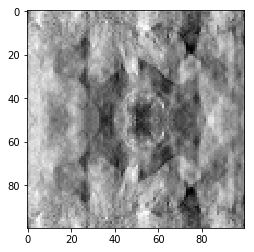

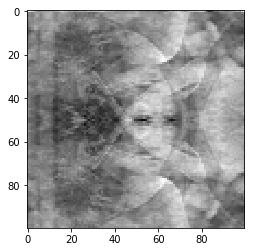

In [13]:
from matplotlib import pyplot as plt
def original(img):
    row=[]
    col=[]
    m,n=img.shape
    result = np.array(img)
    for p in result:
        row.append(find_idft(p))
    result2 = np.array(row)
    for p in result2.T:
        col.append(find_idft(p))
    result3 = np.array(col)
    return (result3.T/(m*n))

# arr = np.array(arr)
# print(original(arr))
orig_img_dog = original(lena_mag_dog_phase)
orig_img_lena = original(dog_mag_lena_phase)
print("idft image:  ",(orig_img_lena))
plt.imshow(orig_img_dog,cmap='gray')
plt.show()
plt.imshow(orig_img_lena,cmap='gray')
plt.show()
# img2 = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
# resultR = np.array(img2)
# li=[]
# for p in resultR.T:
#         li.append(find_idft(p))
# print(li)